# Objetivo:

Establecer los elementos mínimos del lenguaje $\texttt{Python}$, que son base para programar métodos numéricos.

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from IPython.display import IFrame, display

In [5]:
file = 'feynman.jpeg'
IFrame(file, width=400, height=400) 

In [7]:
# Listas 

mylist = [ 3.15,2.35,6.89,4.52,3.32 ]
print(mylist)

[3.15, 2.35, 6.89, 4.52, 3.32]


In [10]:
print(mylist[1],mylist[-1], mylist[:])

(2.35, 3.32, [3.15, 2.35, 6.89, 4.52, 3.32])


In [13]:
print(mylist[0:2], mylist[:2], mylist[2:])

([3.15, 2.35], [3.15, 2.35], [6.89, 4.52, 3.32])


In [16]:
mylist.insert(2,5.63)
mylist.append(6.35995)
mylist.insert(-1,100)
print(mylist)

[3.15, 2.35, 5.63, 5.63, 5.63, 6.89, 4.52, 3.32, 6.35995, 100, 6.35995]


In [20]:
# Leer 
file1 = 'Data/data1.dat'
data = np.loadtxt(file1)
print(data)

[[  1.    1.    0.9]
 [  2.    2.2   7.8]
 [  3.    2.5  27.5]
 [  4.    4.4  67. ]
 [  5.    6.  130. ]]


In [22]:
tiempo = data[:,0]
x = data[:,1]
y = data[:,2]

print(tiempo,x,y)

(array([1., 2., 3., 4., 5.]), array([1. , 2.2, 2.5, 4.4, 6. ]), array([  0.9,   7.8,  27.5,  67. , 130. ]))


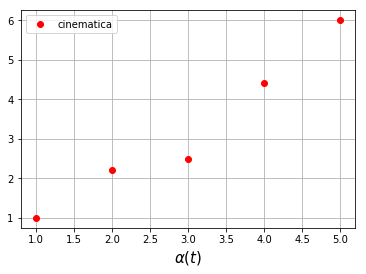

In [38]:

plt.plot(tiempo, x, 'ro', label='cinematica')

plt.xlabel(r'$\alpha(t)$', fontsize=15)
plt.grid()
plt.legend()
plt.savefig('xvst.pdf')

In [48]:
#!pip install numpy # Instruccion de la shell
!ls -Ra
#touch .gitkeep

.:
.   Data	  Figures	      Reading1.ipynb
..  feynman.jpeg  .ipynb_checkpoints  xvst.pdf

./Data:
.  ..  data1.dat

./Figures:
.  ..  .gitkeep

./.ipynb_checkpoints:
.  ..  Reading1-checkpoint.ipynb


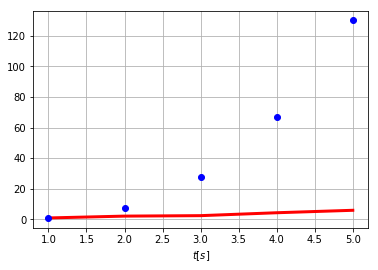

In [45]:
fig, ax = plt.subplots()
p1 = ax.plot(tiempo,x,'r', linewidth=3)
p2 = ax.plot(tiempo,y,'bo')

ax.set_xlabel(r"$t[s]$")
plt.grid()

# Nuclear Decay

$$ N(t) = N_{0}e^{-\alpha t}  $$

In [49]:
# c++ std::cout 

def Funcion(t, N0_, alpha_):
    return N0_*np.exp(-alpha_*t)

In [54]:
N0 = 1000
alpha = 0.8

# la variable independiente
t = np.linspace(0.1,2.,100)
#print(t, type(t))

In [59]:
y = np.zeros(len(t))

# version python
#y = Funcion(t,N0,alpha)
# version c++
for i in range(len(t)):
    y[i] = Funcion(t[i],N0,alpha)


print(y)

[923.11634639 909.05149581 895.2009411  881.5614172  868.12970877
 854.9026495  841.87712127 829.05005352 816.41842245 803.97925033
 791.7296048  779.66659819 767.78738682 756.08917032 744.56919102
 733.22473324 722.05312269 711.05172583 700.21794923 689.54923897
 679.04308008 668.69699587 658.5085474  648.47533289 638.59498715
 628.86518103 619.28362087 609.84804796 600.55623799 591.40600056
 582.39517862 573.521648   564.7833169  556.17812537 547.70404487
 539.35907776 531.14125683 523.04864484 515.07933408 507.23144589
 499.50313025 491.89256533 484.39795703 477.01753861 469.74957024
 462.59233861 455.5441565  448.6033624  441.76832011 435.03741838
 428.40907049 421.88171391 415.4538099  409.12384317 402.89032153
 396.75177551 390.70675804 384.7538441  378.89163036 373.1187349
 367.43379684 361.83547603 356.32245276 350.8934274  345.54712014
 340.28227066 335.09763786 329.99199952 324.96415208 320.01291027
 315.13710693 310.33559265 305.60723554 300.95092096 296.36555125
 291.850045

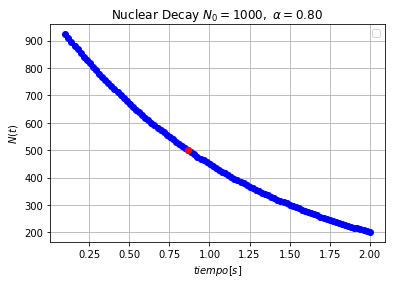

In [60]:
fig, ax = plt.subplots()

p1 = ax.plot(t, y, 'bo') # Deben tener la misma dimension
p2 = ax.plot(np.log(2)/alpha, 0.5*N0, 'ro')

ax.set(xlabel = r'$tiempo[s]$', ylabel = r'$N(t)$', title=r'$\mathrm{Nuclear \ Decay} \ N_{0}=%.0f, \ \alpha = %.2f$' %(N0,alpha))

ax.grid()
ax.legend()

plt.savefig('Figures/Decay.pdf')
plt.show()

## Vamos a crear nuestra primera anim!

In [61]:
filenames = []

def CreateFig(alpha_, it):
    
    t = np.linspace(0.01,10.,50)
    y = Funcion(t,N0,alpha_)
    
    mean = np.log(2)/alpha_
    
    fig, ax = plt.subplots()
    p1 = ax.plot(t,y,'bo')
    p2 = ax.plot(mean, 0.5*N0, 'ro')
    
    ax.set_xlim(0.,10.)
    ax.set_ylim(0.,1000.)
    
    ax.set(xlabel = 'tiempo[s]',
        ylabel = 'N(t)',
        title =r'$\mathrm{Nuclear \ Decay: %.0f} \ N_{0}=%.0f, \ \alpha=%.2f \ \mu=%.3f$' %(it, N0, alpha_, mean))
    ax.grid()
    ax.legend()
    
    filename = "Figures/%02d"%it + ".png"
    filenames.append(filename)
    plt.savefig(filename)
    plt.close()

In [67]:
alpha_test = np.linspace(0.1,1.0,50)
print(alpha_test)

[0.1        0.11836735 0.13673469 0.15510204 0.17346939 0.19183673
 0.21020408 0.22857143 0.24693878 0.26530612 0.28367347 0.30204082
 0.32040816 0.33877551 0.35714286 0.3755102  0.39387755 0.4122449
 0.43061224 0.44897959 0.46734694 0.48571429 0.50408163 0.52244898
 0.54081633 0.55918367 0.57755102 0.59591837 0.61428571 0.63265306
 0.65102041 0.66938776 0.6877551  0.70612245 0.7244898  0.74285714
 0.76122449 0.77959184 0.79795918 0.81632653 0.83469388 0.85306122
 0.87142857 0.88979592 0.90816327 0.92653061 0.94489796 0.96326531
 0.98163265 1.        ]


In [68]:
num_fig = 0

for i in alpha_test:
    CreateFig(i,num_fig)
    num_fig += 1
    print(num_fig-1,i)

(0, 0.1)
(1, 0.11836734693877551)
(2, 0.13673469387755102)
(3, 0.15510204081632656)
(4, 0.17346938775510207)
(5, 0.19183673469387758)
(6, 0.21020408163265308)
(7, 0.2285714285714286)
(8, 0.2469387755102041)
(9, 0.2653061224489796)
(10, 0.2836734693877551)
(11, 0.3020408163265306)
(12, 0.3204081632653062)
(13, 0.3387755102040817)
(14, 0.3571428571428572)
(15, 0.3755102040816327)
(16, 0.3938775510204082)
(17, 0.41224489795918373)
(18, 0.43061224489795924)
(19, 0.44897959183673475)
(20, 0.46734693877551026)
(21, 0.48571428571428577)
(22, 0.5040816326530613)
(23, 0.5224489795918368)
(24, 0.5408163265306123)
(25, 0.5591836734693878)
(26, 0.5775510204081633)
(27, 0.5959183673469388)
(28, 0.6142857142857143)
(29, 0.6326530612244898)
(30, 0.6510204081632653)
(31, 0.6693877551020408)
(32, 0.6877551020408164)
(33, 0.7061224489795919)
(34, 0.7244897959183674)
(35, 0.7428571428571429)
(36, 0.7612244897959184)
(37, 0.7795918367346939)
(38, 0.7979591836734694)
(39, 0.8163265306122449)
(40, 0.8346938

In [69]:
!convert Figures/* -loop 0 -delay 200 decay.gif
!rm Figures/*
!echo '--- Creating gif ---'

convert-im6.q16: not authorized `Figures/Decay.pdf' @ error/constitute.c/ReadImage/412.
--- Creating gif ---
